## **NETWORK ANALYSIS**



**INSTALACIÓN VERSIÓN 2.4 NETWORKX**

In [ ]:
!pip3 install networkx==2.4

In [2]:
!pip3 install networkx==2.4 --upgrade

Requirement already up-to-date: networkx==2.4 in /usr/local/lib/python3.6/dist-packages (2.4)


**IMPORT LIBRARIES**

In [5]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

In [6]:
import pandas as pd
import numpy as np

**IMPORT FILE**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DATANETWORKANALYSIS.txt to DATANETWORKANALYSIS.txt


**CHANGE FORMAT NUMERIC TO STRING**

In [7]:
DATA = pd.read_csv('DATANETWORKANALYSIS.txt')
#FILL NAN WITH ZERO(0)
DATA.fillna(0,inplace=True)
DATA['Id_origin']=DATA['Id_origin'].astype(int).astype(str)
DATA['Id_destination']=DATA['Id_destination'].astype(int).astype(str)
DATA.head(3)

,Id_origin,Id_destination,USD,Qtrx
0,314173,0,8.6,1
1,263880,542,14.3,1
2,25726,181334,85.7,1


**REMOVE ID_ORIGIN AND ID_DESTINATION == 0. REMOVE WHERE ID_ORIGIN=ID_DESTINATION**



In [8]:
DATA=DATA[(DATA['Id_origin'] !='0') & (DATA['Id_destination'] !='0') & (DATA['Id_origin'] !=DATA['Id_destination'])]
DATA

,Id_origin,Id_destination,USD,Qtrx
1,263880,542,14.3,1
2,25726,181334,85.7,1
3,300864,88898,6.0,2
4,233547,233718,2.9,1
5,302130,18642,85.7,1
...,...,...,...,...
499993,408489,233126,22.9,1
499994,385834,233126,28.6,1
499995,382255,233126,22.9,1
499996,25918,519406,10.0,1


**DROP NA**

In [ ]:
DATA=DATA.dropna(how='all', axis=1)
DATA

**REMOVE VALUES >= USD 15. VERY SMALL VALUES ARE NOT IMPORTANT IN THE ANALYSIS**

In [9]:
DATA=DATA[(DATA['USD'] >=15)]
DATA

,Id_origin,Id_destination,USD,Qtrx
2,25726,181334,85.7,1
5,302130,18642,85.7,1
6,94478,18642,85.7,1
12,255532,228668,117.1,3
13,193173,190852,28.6,1
...,...,...,...,...
499989,60691,60675,41.4,1
499992,189960,395010,82.9,2
499993,408489,233126,22.9,1
499994,385834,233126,28.6,1


**CALULATE THE TOTAL TRADED AND THE NUMBER OF TRANSACIONS**

In [12]:
df1=DATA.groupby(['Id_origin','Id_destination'])['USD'].sum()
df2=DATA.groupby(['Id_origin','Id_destination'])['Qtrx'].sum()
df3=pd.merge(df1, df2, left_index=True, right_index=True).reset_index()
df3.head(3)
df3

,Id_origin,Id_destination,USD,Qtrx
0,10,114521,28.6,1
1,10,93888,65.7,1
2,1000,288018,114.3,4
3,10000,150995,28.6,1
4,100001,517288,67.1,1
...,...,...,...,...
205615,99987,99335,41.4,1
205616,9999,166202,28.6,1
205617,99994,163739,42.3,1
205618,99998,163956,38.0,2


**CALCULATE THE GRADE OF EACH ID**

In [ ]:
df5 = DATA.groupby(['Id_origin']).size().to_frame('count')
At_Nodos_Ben=df5.reset_index(level=['Id_origin'])
At_Nodos_Ben.columns=['Nodo','Grado']

df6 = DATA.groupby(['Id_destination']).size().to_frame('count')
At_Nodos_Rem=df6.reset_index(level=['Id_destination'])
At_Nodos_Rem.columns=['Nodo','Grado']

Nodos=At_Nodos_Ben.append(At_Nodos_Rem) 
Nodos=np.array(Nodos)
At_Nodos = { t[0]:t[1] for t in Nodos}
At_Nodos

**REMOVE DUPLICATES**

In [15]:
duplicateRowsDF = df3[df3.duplicated()]
duplicateRowsDF

,Id_origin,Id_destination,USD,Qtrx


In [16]:
arr=np.array(df3)
d = {tuple(t[0:2]):t[2] for t in arr }

In [17]:
arr=np.array(df3)
d1 = {tuple(t[0:2]):t[3] for t in arr}

**AN ARRAY IS CREATED FOR EACH OF THE PAIRS OF "Id_origin" AND "Id_destination"**

In [18]:
node_names = [n for n in DATA['Id_origin']] 
node_names1 = [n for n in DATA['Id_destination']] 
              
node_names=node_names+node_names1
#len(node_names)

edges = DATA[['Id_origin','Id_destination']].to_numpy().tolist()

**THE GRAPHIC IS CREATED AND THE RESPECTIVE NODES AND EDGES ARE ADDED TO IT**

In [19]:
G = nx.Graph()

In [20]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [23]:
nx.set_edge_attributes(G, d, 'Valor')
nx.set_edge_attributes(G, d1, 'Cantidad')
nx.set_node_attributes(G, At_Nodos, 'Grado')

In [24]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 282714
Number of edges: 201708
Average degree:   1.4269


**CALCULATE OF THE DENSITY OF THE NON-DIRECTED GRAPHIC**

In [25]:
density = nx.density(G)
print("Network density:", density)

Network density: 5.047310523715777e-06


**A DICTIONARY IS CREATED WITH THE DEGREES OF EACH OF THE NODES, AND IT IS ADDED AS AN ATTRIBUTE TO THE GRAPH**

In [27]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

**THE DICTIONARY OF DEGREES IS ORDERED IN A DESCENDING WAY**

In [28]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

**THE QUANTILE 99.99 OF THE SAMPLE IS CALCULATED IN ORDER TO KNOW WHERE THE HIGHEST VALUES ARE LOCATED IN TERMS OF DEGREES**

In [29]:
sorted_degree2=pd.DataFrame(sorted_degree,columns=['Id','Grado'])
print('Grado '+str(sorted_degree2.Grado.quantile(0.9999)))

Grado 24.728699999977835


In [30]:
print("Top 30 nodes by degree:")
for d in sorted_degree[:50]:
    print(d)

Top 30 nodes by degree:
('22975', 73)
('493632', 37)
('521460', 36)
('26890', 35)
('396963', 34)
('424354', 32)
('14465', 32)
('49785', 31)
('399799', 30)
('522555', 30)
('101253', 30)
('149165', 29)
('434507', 29)
('4404', 29)
('237937', 28)
('389052', 28)
('355643', 28)
('427503', 27)
('355413', 27)
('341782', 27)
('389065', 27)
('377980', 26)
('368094', 26)
('148303', 26)
('428500', 26)
('75137', 25)
('428695', 25)
('159492', 25)
('45642', 25)
('102395', 24)
('526712', 24)
('400269', 24)
('48545', 24)
('158354', 23)
('122177', 23)
('428574', 23)
('73329', 23)
('133521', 23)
('48688', 23)
('4096', 23)
('442311', 23)
('34409', 22)
('248850', 22)
('368202', 22)
('233406', 22)
('413463', 22)
('177543', 22)
('321893', 22)
('247728', 22)
('295794', 22)


**ALL THOSE NODES THAT HAVE A GRADE LESS THAN 2 AND GREATER THAN 500 ARE FILTERED, IN ORDER TO HAVE A CLEANER GRAPHIC**

In [31]:
to_remove =[n for n in At_Nodos if At_Nodos[n] < 2]
to_remove_many =[n for n in At_Nodos if At_Nodos[n] > 500]

In [32]:
G.remove_nodes_from(to_remove)
G.remove_nodes_from(to_remove_many)

In [33]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 56339
Number of edges: 35100
Average degree:   1.2460


**BY USING THE FOLLOWING ALGORTIME, COMMUNITIES ARE FOUND IN THE GRAPH USING THE "Clauset-Newman-Moore" GREEDY MODULARITY MAXIMIZATION. THIS METHOD DOES NOT CONSIDER THE WEIGHTS OF THE EDGES.**

In [34]:
communities = community.greedy_modularity_communities(G)

**IMPORT LIBRARY COMMUNITY**

In [36]:
import community as com

In [37]:
communitiess = com.best_partition(G) 
global_modularity = com.modularity(communitiess, G)
print(global_modularity)

0.9964431802502707


**CALCULATE THE MODULARITY FOR EACH ONE OF THE NODES AND IT IS ADDED AS AN ATTRIBUTE OF THE GRAPH**

In [39]:
modularity_dict = {} 
for i,c in enumerate(communities): 
    for name in c: 
        modularity_dict[name] = i 

nx.set_node_attributes(G, modularity_dict, 'modularity')

**LISTING OF EACH NETWORK THAT HAS A CONNECTION GREATER THAN 20 NODES. A TUPLE IS CREATED WITH THE GROUP OF IDs THAT MAKE PART OF IT**

In [40]:
for i,c in enumerate(communities): 
    if len(c) > 20: 
        print(str(i)+':', tuple(c)) 

0: ('137686', '12931', '221599', '462757', '511329', '388314', '142443', '220714', '453652', '404844', '335433', '6076', '247155', '114747', '404865', '271201', '118752', '331792', '314052', '170308', '432402', '216978', '154374', '476198', '482513', '131819', '515647', '327622', '40888', '378285', '313927', '433744', '525249', '50901', '497312', '336444', '246081', '8327', '401664', '305968', '199063', '501622', '201979', '118198', '468926', '514193', '25036', '285289', '63066', '10719', '104897', '196262', '201558', '392004', '371314', '216064', '462817', '361719', '261193', '388183', '520899', '146713', '480299', '133116', '505420', '324805', '15812', '389762', '39572', '135381', '310409', '465430', '456105', '15717', '450130', '317608', '54850', '244790', '218926', '284422', '418573', '323310', '262132', '275086', '500649', '497348', '484904', '8038', '215504', '30353', '266011', '1759', '34735', '526443', '528335', '417191', '258759', '515864', '320885', '321791', '527519', '36069

In [41]:
Comunidades=[]
for i,c in enumerate(communities): 
    if len(c) > 20: 
        Comunidades.append(tuple(c))

**IN A TUPLE ALL IDS THAT MAKE UP EACH COMMUNITY OR NETWORK ARE ADDED**

In [42]:
prueba=[]
for i in range(len(Comunidades)):
  for j in range(len(Comunidades[i])):
    Id=Comunidades[i]
    prueba
    prueba.append([i,Id])
prueba=pd.DataFrame(prueba, columns=['Comunidad','Comunidad2'])
prueba=prueba.drop_duplicates()
prueba

,Comunidad,Comunidad2
0,0,"(137686, 12931, 221599, 462757, 511329, 388314..."
408,1,"(333302, 349090, 396245, 377129, 454430, 25580..."
766,2,"(311199, 287196, 333198, 380439, 1126, 130599,..."
1081,3,"(406527, 344258, 214205, 203455, 95669, 412423..."
1387,4,"(288984, 398047, 123501, 493974, 111897, 40081..."
...,...,...
9254,121,"(291626, 431658, 424810, 422787, 203830, 29934..."
9275,122,"(35811, 15476, 191286, 125521, 338202, 10163, ..."
9296,123,"(417451, 202747, 51736, 332798, 203559, 207963..."
9317,124,"(293950, 336383, 192251, 226597, 338856, 19047..."


**THROUGH A NESTED LOOP, A DATAFRAME IS CREATED THAT CONTAINS THE NUMBER OF THE COMMUNITY TO WHICH EACH OF THE IDs BELONG WITH ITS RESPECTIVE GRADE**

In [43]:
Salidas=[]
for i in range(len(Comunidades)):
  for j in range(len(Comunidades[i])):
    Grado=G.nodes[Comunidades[i][j]]['Grado']
    Id=Comunidades[i][j]
    Salidas.append([i,Id,Grado])
Salidas=pd.DataFrame(Salidas, columns=['Comunidad','Id','Grado'])
Salidas.head(5)

,Comunidad,Id,Grado
0,0,137686,2
1,0,12931,4
2,0,221599,2
3,0,462757,4
4,0,511329,5


**A LIST OF THE IDs INVOLVED IN THE COMMUNITIES IS CREATED TO EXTRACT THE TRANSACTIONS FROM EACH "Id_origin" AND "Id_destination", TO THEN MAKE AN APPPEND AND ADD THE COMMUNITY NUMBER**

In [44]:
lista_id=list(Salidas['Id'])
lista_id
trx_comunidades=DATA[DATA.Id_origin.isin(lista_id)]
trx_comunidades

,Id_origin,Id_destination,USD,Qtrx
41,74520,179210,17.7,1
99,148097,329992,28.6,1
100,292438,329992,28.6,1
101,379957,329992,28.6,1
193,297678,465662,36.3,3
...,...,...,...,...
499675,426294,426601,180.0,2
499791,238425,244236,65.7,3
499830,172364,381514,66.9,2
499831,381146,381514,28.6,1


In [45]:
trx_comunidades2=DATA[DATA.Id_destination.isin(lista_id)]
trx_comunidades2

,Id_origin,Id_destination,USD,Qtrx
99,148097,329992,28.6,1
100,292438,329992,28.6,1
101,379957,329992,28.6,1
193,297678,465662,36.3,3
194,369188,465662,17.4,1
...,...,...,...,...
499791,238425,244236,65.7,3
499830,172364,381514,66.9,2
499831,381146,381514,28.6,1
499890,287038,404213,24.6,2


In [53]:
trs_total_comunidad=trx_comunidades.append(trx_comunidades2)
trs_total_comunidad

,Id_origin,Id_destination,USD,Qtrx
41,74520,179210,17.7,1
99,148097,329992,28.6,1
100,292438,329992,28.6,1
101,379957,329992,28.6,1
193,297678,465662,36.3,3
...,...,...,...,...
499791,238425,244236,65.7,3
499830,172364,381514,66.9,2
499831,381146,381514,28.6,1
499890,287038,404213,24.6,2


In [54]:
trs_total_comunidad=pd.merge(trs_total_comunidad, Salidas[['Id','Comunidad']], left_on='Id_origin', right_on='Id', how='left')
trs_total_comunidad

,Id_origin,Id_destination,USD,Qtrx,Id,Comunidad
0,74520,179210,17.7,1,74520,2.0
1,148097,329992,28.6,1,148097,30.0
2,292438,329992,28.6,1,292438,30.0
3,379957,329992,28.6,1,379957,30.0
4,297678,465662,36.3,3,297678,4.0
...,...,...,...,...,...,...
35160,238425,244236,65.7,3,238425,2.0
35161,172364,381514,66.9,2,172364,42.0
35162,381146,381514,28.6,1,381146,42.0
35163,287038,404213,24.6,2,NaN,NaN


In [55]:
trs_total_comunidad=pd.merge(trs_total_comunidad, Salidas[['Id','Comunidad']], left_on='Id_destination', right_on='Id', how='left')
trs_total_comunidad

,Id_origin,Id_destination,USD,Qtrx,Id_x,Comunidad_x,Id_y,Comunidad_y
0,74520,179210,17.7,1,74520,2.0,NaN,NaN
1,148097,329992,28.6,1,148097,30.0,329992,30.0
2,292438,329992,28.6,1,292438,30.0,329992,30.0
3,379957,329992,28.6,1,379957,30.0,329992,30.0
4,297678,465662,36.3,3,297678,4.0,465662,4.0
...,...,...,...,...,...,...,...,...
35160,238425,244236,65.7,3,238425,2.0,244236,2.0
35161,172364,381514,66.9,2,172364,42.0,381514,42.0
35162,381146,381514,28.6,1,381146,42.0,381514,42.0
35163,287038,404213,24.6,2,NaN,NaN,404213,17.0


In [56]:
trs_total_comunidad.loc[(trs_total_comunidad['Comunidad_x']>=0), 'Comunidad'] = trs_total_comunidad['Comunidad_x']

In [57]:
trs_total_comunidad.loc[(trs_total_comunidad['Comunidad_x'].isnull()) & (trs_total_comunidad['Comunidad'].isnull()) , 'Comunidad'] = trs_total_comunidad['Comunidad_y']

In [58]:
trs_total_comunidad

,Id_origin,Id_destination,USD,Qtrx,Id_x,Comunidad_x,Id_y,Comunidad_y,Comunidad
0,74520,179210,17.7,1,74520,2.0,NaN,NaN,2.0
1,148097,329992,28.6,1,148097,30.0,329992,30.0,30.0
2,292438,329992,28.6,1,292438,30.0,329992,30.0,30.0
3,379957,329992,28.6,1,379957,30.0,329992,30.0,30.0
4,297678,465662,36.3,3,297678,4.0,465662,4.0,4.0
...,...,...,...,...,...,...,...,...,...
35160,238425,244236,65.7,3,238425,2.0,244236,2.0,2.0
35161,172364,381514,66.9,2,172364,42.0,381514,42.0,42.0
35162,381146,381514,28.6,1,381146,42.0,381514,42.0,42.0
35163,287038,404213,24.6,2,NaN,NaN,404213,17.0,17.0


In [59]:
trs_total_comunidad.drop(trs_total_comunidad.columns[[4,5,6,7]], axis = 1, inplace = True)
trs_total_comunidad

,Id_origin,Id_destination,USD,Qtrx,Comunidad
0,74520,179210,17.7,1,2.0
1,148097,329992,28.6,1,30.0
2,292438,329992,28.6,1,30.0
3,379957,329992,28.6,1,30.0
4,297678,465662,36.3,3,4.0
...,...,...,...,...,...
35160,238425,244236,65.7,3,2.0
35161,172364,381514,66.9,2,42.0
35162,381146,381514,28.6,1,42.0
35163,287038,404213,24.6,2,17.0


**DOWNLOAD THE DETAILED TRANSACTIONS OF ALL COMMUNITIES**

In [ ]:
trs_total_comunidad.to_excel('Comunidades_trx.xlsx')

In [60]:
Salidas=pd.DataFrame(Salidas, columns=['Comunidad','Id','Grado'])
Salidas.head(5)

,Comunidad,Id,Grado
0,0,137686,2
1,0,12931,4
2,0,221599,2
3,0,462757,4
4,0,511329,5


In [61]:
len(Salidas)

9359

**THROUGH NESTED LOOPS, TAKING AS INPUT THE TABLE OF "OUTPUTS" THAT CONTAINS THE NUMBER OF THE COMMUNITY TO WHICH AN ID BELONGS AND THE RESPECTIVE GRADE, THE "NEIGHBORHOOD" WHICH ARE THOSE GROUPS OF IDs WITH WHICH THE ID BELONGS , AS WELL AS THE TRADED VALUE AND THE AMOUNT OF TRANSACTIONS CARRIED OUT**

In [62]:
Tablas5=[]
for i in  range(len(Salidas)):
  Vecinos=[]
  Suma=0
  Cantidad=0
  for j in range(len(G.edges(Salidas['Id'][i]))):
    a=list(G.edges(Salidas['Id'][i]))
    Vecindad=list(G.edges(Salidas['Id'][i]))
    Cantidad=Cantidad+float(G.edges[a[j]]['Cantidad'])
    Suma=Suma+float(G.edges[a[j]]['Valor'])
  Tablas5.append([Salidas['Comunidad'][i],Salidas['Id'][i],Salidas['Grado'][i],tuple(Vecindad),Suma,Cantidad])

Tablas5=pd.DataFrame(Tablas5 , columns=['Comunidad','Id','Grado','Vecindad', 'Valor','Cantidad'])
Tablas5.head(10)

,Comunidad,Id,Grado,Vecindad,Valor,Cantidad
0,0,137686,2,"((137686, 418794),)",17.1,1.0
1,0,12931,4,"((12931, 21823), (12931, 385549), (12931, 96567))",114.3,3.0
2,0,221599,2,"((221599, 320147), (221599, 377337))",57.2,2.0
3,0,462757,4,"((462757, 462817), (462757, 336444), (462757, ...",426.6,8.0
4,0,511329,5,"((511329, 246192), (511329, 481520), (511329, ...",743.0,26.0
5,0,388314,2,"((388314, 8327),)",28.6,1.0
6,0,142443,2,"((142443, 468926), (142443, 160732))",80.9,3.0
7,0,220714,2,"((220714, 95356),)",28.6,1.0
8,0,453652,3,"((453652, 404865), (453652, 5792))",262.9,4.0
9,0,404844,6,"((404844, 404865), (404844, 511329), (404844, ...",85.8,3.0


**UNIQUE VALUES ARE TAKEN FROM THE PREVIOUS TABLE AND THE SIZE OF THE NETWORK IS CALCULATED IN REGARD TO THE NUMBER OF PEOPLE WHO INTERACT AND THE TOTAL TRANSACTION IN THE WHOLE NETWORK**

In [63]:
Agregado6=Tablas5.groupby('Comunidad').Valor.nunique()
Agregado6
Agregado7=Tablas5.groupby(['Comunidad','Valor']).Valor.count()
Agregado7=pd.DataFrame(Agregado7).rename(columns={'Valor':'Total'})
Agregado7=Agregado7.reset_index(level=['Comunidad','Valor'])

Agregado7=Agregado7.groupby('Comunidad')['Total'].apply(lambda x: (x>5).sum()).reset_index(name='count')
Agregado7=Agregado7.set_index('Comunidad')
print (Agregado7)

           count
Comunidad       
0              6
1              7
2              5
3              5
4              2
...          ...
121            0
122            1
123            0
124            0
125            0

[126 rows x 1 columns]


**SE CREA LA TABLA "ESTADISTICOS" QUE ES LA QUE CONTIENE TODA LA INFORMACIÓN DE CADA UNO DE LAS COMUNIDADES COMO POR EJEMPLO: 'Comunidad', 'ValorRed', 'ValorPromedioParticipante', 'EdgePromedio', 'GradoPromedio', 'TamañoRed','DiferentesValores', 'MismoValor'**

In [71]:
Agregado=Tablas5.groupby(['Comunidad'])['Valor'].sum()
Agregado1=Tablas5.groupby(['Comunidad'])['Valor'].mean()
Agregado2=Tablas5.groupby(['Comunidad'])['Cantidad'].mean()

Agregado3=Tablas5.groupby(['Comunidad','Id'])['Grado'].max()
Agergado3=pd.DataFrame(Agregado3)
Agregado3=Agregado3.reset_index(level=['Comunidad','Id'])
Agregado3=Agregado3.groupby(['Comunidad'])['Grado'].mean()

Agregado5=Tablas5.groupby('Comunidad').Id.nunique()

Estadisticos=pd.concat([Agregado,Agregado1,Agregado2,Agregado3,Agregado5], axis=1)
Estadisticos=Estadisticos.reset_index(level=['Comunidad'])
Estadisticos.columns = ['Comunidad', 'ValueCommunity','AverageParticipantValue','EdgeAverage','GradeAverage','SizeCommunity']
Estadisticos.head(2)

,Comunidad,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity
0,0,59490.9,145.811029,4.446078,3.340686,408
1,1,49270.3,137.626536,4.427374,3.265363,358


**MERGE BETWEEN "TABLE5" AND "STATISTICS" IN ORDER TO OBTAIN MORE COMPLETE INFORMATION ON EACH ID AND EACH IDENTIFIED COMMUNITY.**

In [72]:
Final=Tablas5.merge(Estadisticos,on='Comunidad',how='left')
Final

,Comunidad,Id,Grado,Vecindad,Valor,Cantidad,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity
0,0,137686,2,"((137686, 418794),)",17.1,1.0,59490.9,145.811029,4.446078,3.340686,408
1,0,12931,4,"((12931, 21823), (12931, 385549), (12931, 96567))",114.3,3.0,59490.9,145.811029,4.446078,3.340686,408
2,0,221599,2,"((221599, 320147), (221599, 377337))",57.2,2.0,59490.9,145.811029,4.446078,3.340686,408
3,0,462757,4,"((462757, 462817), (462757, 336444), (462757, ...",426.6,8.0,59490.9,145.811029,4.446078,3.340686,408
4,0,511329,5,"((511329, 246192), (511329, 481520), (511329, ...",743.0,26.0,59490.9,145.811029,4.446078,3.340686,408
...,...,...,...,...,...,...,...,...,...,...,...
9354,125,499201,3,"((499201, 498524),)",73.1,1.0,2247.2,107.009524,4.095238,2.619048,21
9355,125,207632,2,"((207632, 433810), (207632, 429725))",95.7,3.0,2247.2,107.009524,4.095238,2.619048,21
9356,125,7524,2,"((7524, 430287),)",65.7,1.0,2247.2,107.009524,4.095238,2.619048,21
9357,125,432312,2,"((432312, 430287),)",17.7,1.0,2247.2,107.009524,4.095238,2.619048,21


**TO INSTALL SOME POINTS OF ANALYSIS, THE QUANTILE 70 OF THE VARIABLES IS CALCULATED: 'ValueComunnity', 'EdgeAverage', 'GradeAverage' and 'SizeComunnity'.**

In [73]:
print('ValueCommunity '+str(Final.ValueCommunity.quantile(0.7)))
print('EdgeAverage '+str(Final.EdgeAverage.quantile(0.7)))
print('GradeAverage '+str(Final.GradeAverage.quantile(0.7)))
print('SizeCommunity '+str(Final.SizeCommunity.quantile(0.7)))

ValueCommunity 26221.19999999999
EdgeAverage 4.117460317460317
GradeAverage 3.2653631284916202
SizeCommunity 192.0


**THE FOLLOWING CODE IS TO BE ABLE TO GRAPHICALLY VIEW AND ANALYZE ANY NETWORK FROM THE LIST OF NETWORKS CHOSEN IN THE FIRST FILTER, IN WHICH YOU ONLY HAVE TO ENTER THE NETWORK NUMBER**

In [74]:
selected_nodes = [n for n,v in G.nodes(data=True) if n in Comunidades[5]]  
print (selected_nodes)

['121731', '311800', '23930', '234582', '26223', '265082', '146351', '379717', '408882', '406215', '481510', '72810', '489878', '520605', '489260', '22658', '444189', '94140', '50516', '135110', '87543', '189735', '321098', '372858', '129561', '481755', '490065', '368282', '371427', '281287', '499746', '393189', '16279', '195118', '73352', '452844', '408475', '436583', '124449', '132260', '192660', '108510', '291627', '131753', '185052', '3609', '350412', '231151', '69303', '407171', '371131', '137932', '107823', '47450', '483876', '24528', '346446', '470817', '66095', '374887', '140663', '134995', '145379', '386912', '216267', '448026', '466887', '252184', '190733', '138093', '3507', '408108', '483236', '233668', '316368', '276243', '243647', '300060', '406381', '145854', '319905', '303304', '140131', '339341', '375855', '377860', '329000', '165455', '406002', '405314', '312209', '99856', '296164', '484041', '527107', '371505', '126450', '375864', '326150', '466524', '287315', '407278

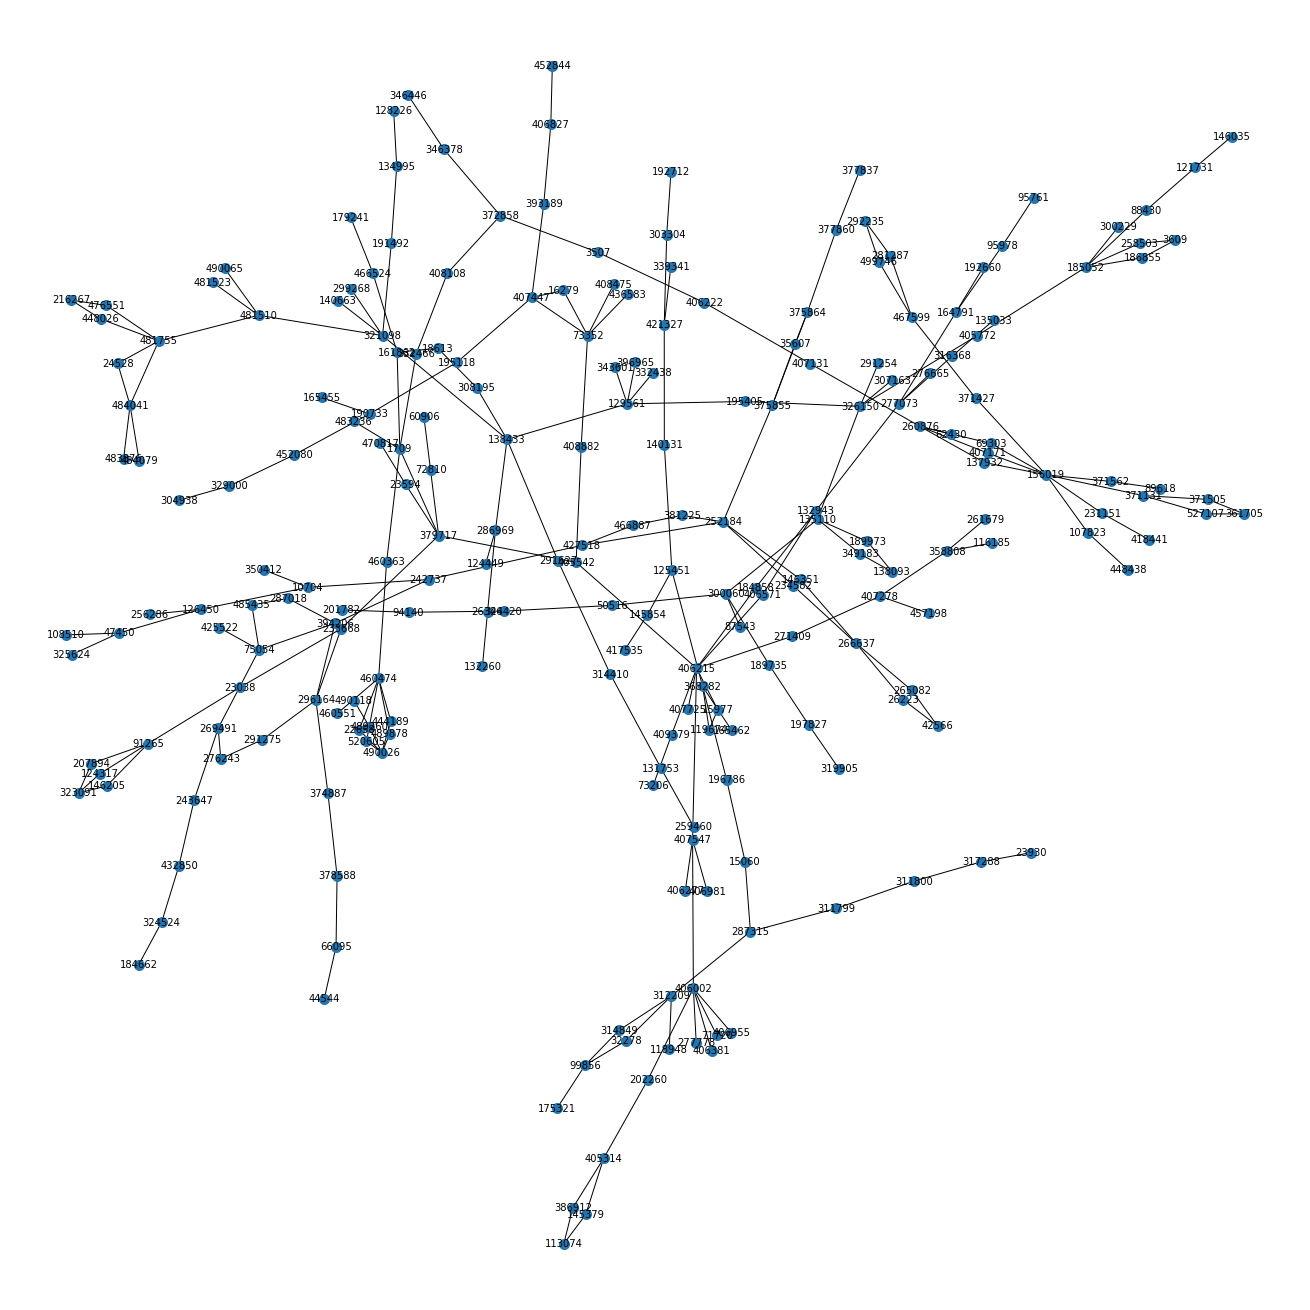

In [76]:
H = G.subgraph(selected_nodes)
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18)) 
nx.draw_spring(H,with_labels=True,node_size=100,font_size=10)

**GRAFICAMOS LA RED ESCOGIDA ANTERIORMENTE, PERO ESCOGIENDO EL COLOR DE RELLENO DE CADA UNO DE LOS NODOS SEGÚN EL "GRADO", DONDE, ENTRE MÁS OSCURO SEA EL COLOR MAYOR ES EL GRADO Y ENTRE MÁS CLARO SEA EL COLOR MENOR ES EL GRADO DEL NODO**

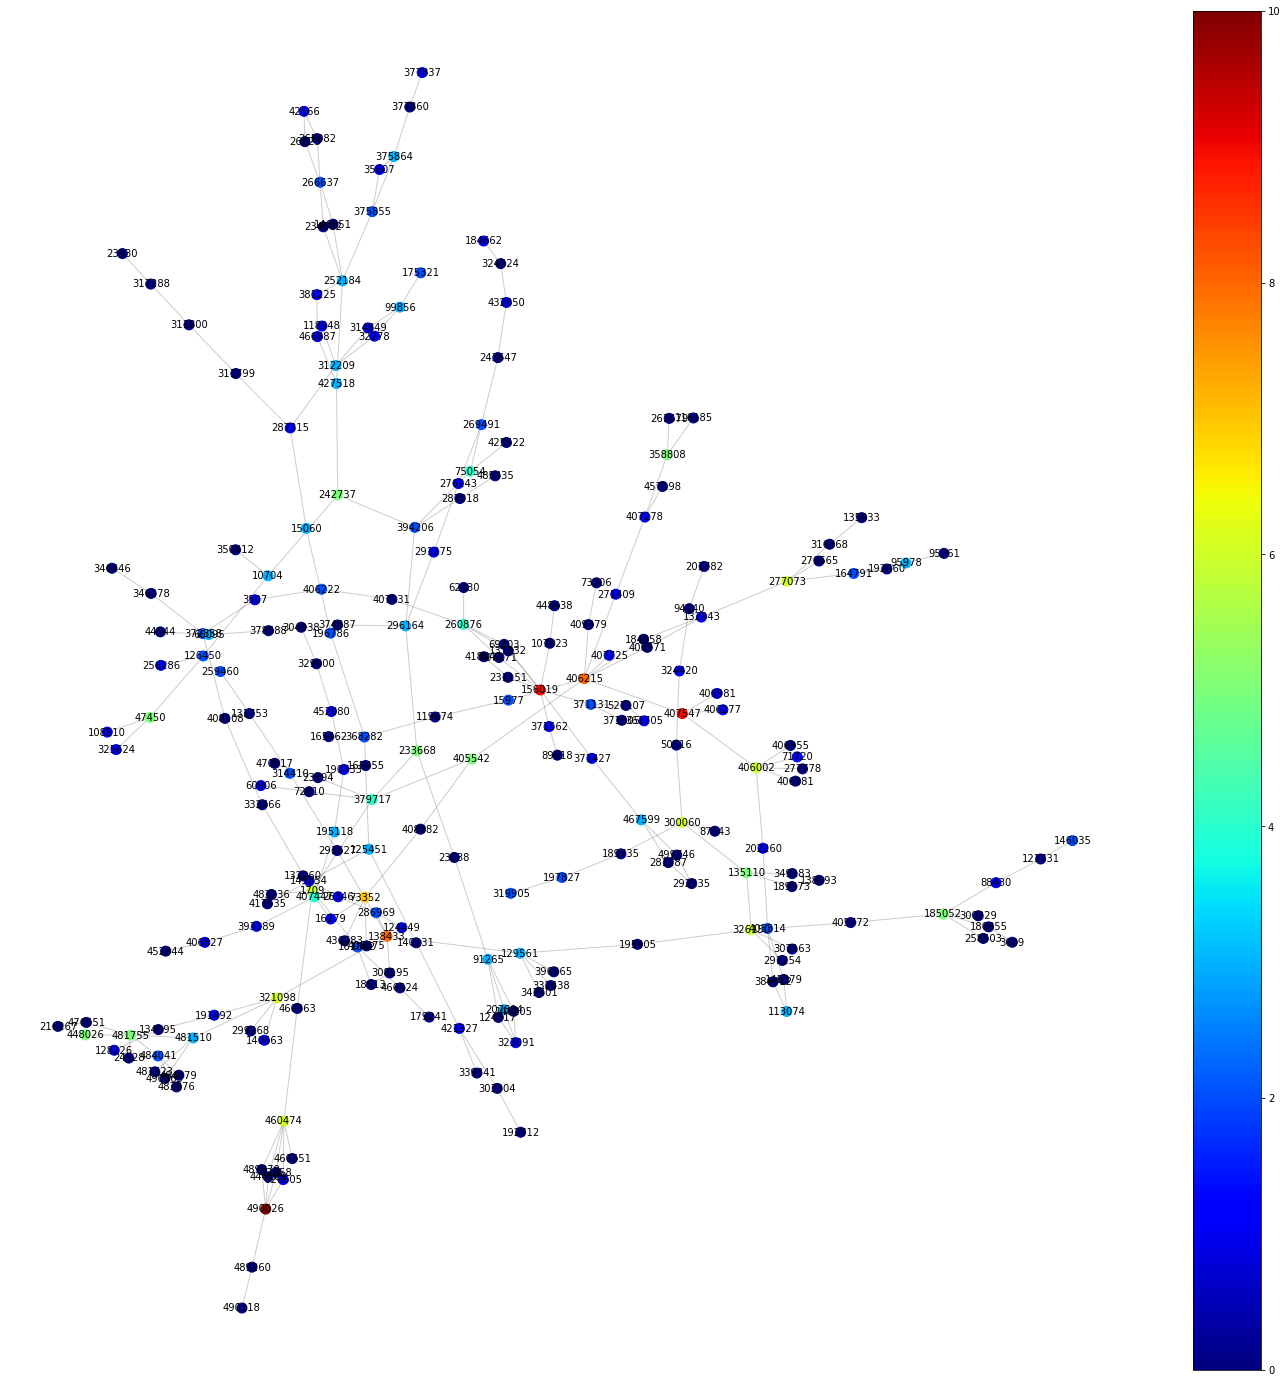

In [77]:
import matplotlib.pyplot as plt
from itertools import count

plt.figure(figsize=(25,25)) 
groups = set(nx.get_node_attributes(H,'degree').values())
mapping = dict(zip(sorted(groups),count()))
nodes = H.nodes()
colors = [mapping[H.nodes[n]['degree']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(H)
ec = nx.draw_networkx_edges(H, pos, alpha=0.2, label=True)
nc = nx.draw_networkx_nodes(H, pos, nodelist=nodes, node_color=colors, 
                             node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_labels(H,pos,font_size=10)
plt.colorbar(nc)
plt.axis('off')
plt.show()

**NOW, ONCE THE BASE AND NODES HAVE BEEN CLEANED IN PREVIOUS STEPS, THE TOTAL TRANSACTION VALUE AND THE AMOUNT OF TRANSACTIONS THAT IT HAD BEFORE THE CLEANING, BOTH FOR THE INPUT AND OUTPUT OF EACH ID IS PROCEEDED**

In [78]:
entrada=DATA.groupby(['Id_destination'])['USD'].sum()
salida=DATA.groupby(['Id_origin'])['USD'].sum()
entrada_q=DATA.groupby(['Id_destination'])['Qtrx'].sum()
salida_q=DATA.groupby(['Id_origin'])['Qtrx'].sum()
entrada.head()
salida.head()

Id_origin
10         94.3
1000      114.3
10000      28.6
100001     67.1
100003     57.1
Name: USD, dtype: float64

**MERGE BETWEEN TOTAL TRANSACTION AND AMOUNT OF INPUT AND OUTPUT TRANSACTIONS**

In [79]:
union=pd.merge(entrada, salida, how='outer', left_index=True, right_index=True).reset_index()
union.head(10)

,index,USD_x,USD_y
0,10,NaN,94.3
1,1000,NaN,114.3
2,10000,NaN,28.6
3,100000,19.7,NaN
4,100001,NaN,67.1
5,100003,NaN,57.1
6,100007,337.1,NaN
7,100010,NaN,22.9
8,100011,NaN,28.6
9,100013,269.4,NaN


**FILL NaN WITH 0**

In [80]:
union.fillna(0,inplace=True)
union

,index,USD_x,USD_y
0,10,0.0,94.3
1,1000,0.0,114.3
2,10000,0.0,28.6
3,100000,19.7,0.0
4,100001,0.0,67.1
...,...,...,...
282709,99987,0.0,41.4
282710,9999,0.0,28.6
282711,99990,260.0,0.0
282712,99994,0.0,42.3


In [81]:
union2=pd.merge(entrada_q, salida_q, how='outer', left_index=True, right_index=True).reset_index()
union2

,index,Qtrx_x,Qtrx_y
0,10,NaN,2.0
1,1000,NaN,4.0
2,10000,NaN,1.0
3,100000,1.0,NaN
4,100001,NaN,1.0
...,...,...,...
282709,99987,NaN,1.0
282710,9999,NaN,1.0
282711,99990,2.0,NaN
282712,99994,NaN,1.0


In [82]:
union2.fillna(0,inplace=True)
union2

,index,Qtrx_x,Qtrx_y
0,10,0.0,2.0
1,1000,0.0,4.0
2,10000,0.0,1.0
3,100000,1.0,0.0
4,100001,0.0,1.0
...,...,...,...
282709,99987,0.0,1.0
282710,9999,0.0,1.0
282711,99990,2.0,0.0
282712,99994,0.0,1.0


In [83]:
union3=pd.merge(union, union2, left_index=True, right_index=True)
union3

,index_x,USD_x,USD_y,index_y,Qtrx_x,Qtrx_y
0,10,0.0,94.3,10,0.0,2.0
1,1000,0.0,114.3,1000,0.0,4.0
2,10000,0.0,28.6,10000,0.0,1.0
3,100000,19.7,0.0,100000,1.0,0.0
4,100001,0.0,67.1,100001,0.0,1.0
...,...,...,...,...,...,...
282709,99987,0.0,41.4,99987,0.0,1.0
282710,9999,0.0,28.6,9999,0.0,1.0
282711,99990,260.0,0.0,99990,2.0,0.0
282712,99994,0.0,42.3,99994,0.0,1.0


In [84]:
union4=union3[['index_x','USD_x','USD_y','Qtrx_x','Qtrx_y']]
union4.columns=['Id','VALUE_INPUT','VALUE_OUTPUT','Q_TRX_INPUT','Q_TRX_OUTPUT']
union4

,Id,VALUE_INPUT,VALUE_OUTPUT,Q_TRX_INPUT,Q_TRX_OUTPUT
0,10,0.0,94.3,0.0,2.0
1,1000,0.0,114.3,0.0,4.0
2,10000,0.0,28.6,0.0,1.0
3,100000,19.7,0.0,1.0,0.0
4,100001,0.0,67.1,0.0,1.0
...,...,...,...,...,...
282709,99987,0.0,41.4,0.0,1.0
282710,9999,0.0,28.6,0.0,1.0
282711,99990,260.0,0.0,2.0,0.0
282712,99994,0.0,42.3,0.0,1.0


### **-------------------------------------------------------------------------------------------------------------------------------**

### **METHODOLOGY 1**

THIS METHODOLOGY SEEKS TO IDENTIFY THE THREE MOST IMPORTANT NODES OF EACH NETWORK ACCORDING TO SOME PARAMETERS OF THE NETWORK IN GENERAL AND INDIVIDUAL

### **-------------------------------------------------------------------------------------------------------------------------------**

**THE DATABASE WHERE ALL THE COMMUNITIES ARE FOUND WITH THEIR GENERAL STATISTICS CALCULATED PREVIOUSLY, AND A MERGE IS MADE WITH THE BASE THAT CONTAINS FOR EACH ID THE TOTAL INPUT, TOTAL OUTPUT, AMOUNT OF TRANSACTIONS AND AMOUNT OF INPUT TRANSACTIONS DEPARTURE.**

In [85]:
completa2=pd.merge(Final, union4[['Id','VALUE_INPUT','VALUE_OUTPUT','Q_TRX_INPUT','Q_TRX_OUTPUT']], on='Id',how='left')
completa2

,Comunidad,Id,Grado,Vecindad,Valor,Cantidad,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity,VALUE_INPUT,VALUE_OUTPUT,Q_TRX_INPUT,Q_TRX_OUTPUT
0,0,137686,2,"((137686, 418794),)",17.1,1.0,59490.9,145.811029,4.446078,3.340686,408,0.0,65.7,0.0,2.0
1,0,12931,4,"((12931, 21823), (12931, 385549), (12931, 96567))",114.3,3.0,59490.9,145.811029,4.446078,3.340686,408,0.0,165.7,0.0,4.0
2,0,221599,2,"((221599, 320147), (221599, 377337))",57.2,2.0,59490.9,145.811029,4.446078,3.340686,408,0.0,57.2,0.0,2.0
3,0,462757,4,"((462757, 462817), (462757, 336444), (462757, ...",426.6,8.0,59490.9,145.811029,4.446078,3.340686,408,242.9,312.3,6.0,5.0
4,0,511329,5,"((511329, 246192), (511329, 481520), (511329, ...",743.0,26.0,59490.9,145.811029,4.446078,3.340686,408,0.0,743.0,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,125,499201,3,"((499201, 498524),)",73.1,1.0,2247.2,107.009524,4.095238,2.619048,21,51.3,73.1,3.0,1.0
9355,125,207632,2,"((207632, 433810), (207632, 429725))",95.7,3.0,2247.2,107.009524,4.095238,2.619048,21,0.0,95.7,0.0,3.0
9356,125,7524,2,"((7524, 430287),)",65.7,1.0,2247.2,107.009524,4.095238,2.619048,21,108.6,57.1,2.0,1.0
9357,125,432312,2,"((432312, 430287),)",17.7,1.0,2247.2,107.009524,4.095238,2.619048,21,0.0,46.3,0.0,2.0


**BASED ON THE PREVIOUS RESULTS, TO FOCUS THE ANALYSIS ON A GROUP OF COMMUNITIES, A FILTER IS MADE ON THE FOLLOWING PARAMETERS, WHICH NOT ONLY TAKE INTO ACCOUNT THE VALUES OF THE NETWORK IN GENERAL, BUT THE INVIVIDUAL NODES ALSO:**

**GENERAL PARAMETERS OF THE COMMUNITY**
*   ValueCommunity >= USD 10000
*   EdgeAverage >= 3
*   GradeAverage >= 3

**NODE PARAMETERS**
*   VALUE_INPUT >= quantile(99)
*   Q_TRX_INPUT (NUMBER OF INPUT TRANSACTIONS) >= quantile(99) or
    Q_TRX_OUTPUT (NUMBER OF OUTPUT TRANSACTIONS)  >= quantile(99)
*   VALUE_OUTPUT >= quantile(99)
*   Q_TRX_INPUT (NUMBER OF INPUT TRANSACTIONS >= quantile(99) or
    Q_TRX_OUTPUT (NUMBER OF OUTPUT TRANSACTIONS)  >= quantile(99)



In [98]:
Alerta2=completa2[(completa2['ValueCommunity'] >= 10000) & (completa2['EdgeAverage'] >=3 ) & (completa2['GradeAverage'] >=3 ) &
((completa2['VALUE_INPUT']>=completa2.VALUE_INPUT.quantile(0.99)) & ((completa2['Q_TRX_INPUT']>=completa2.Q_TRX_INPUT.quantile(0.99)) | (completa2['Q_TRX_OUTPUT']>=completa2.Q_TRX_OUTPUT.quantile(0.99)))) | 
((completa2['VALUE_OUTPUT']>=completa2.VALUE_OUTPUT.quantile(0.99)) & ((completa2['Q_TRX_INPUT']>=completa2.Q_TRX_INPUT.quantile(0.99)) | (completa2['Q_TRX_OUTPUT']>=completa2.Q_TRX_OUTPUT.quantile(0.99))))]
Alerta2

,Comunidad,Id,Grado,Vecindad,Valor,Cantidad,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity,VALUE_INPUT,VALUE_OUTPUT,Q_TRX_INPUT,Q_TRX_OUTPUT
4,0,511329,5,"((511329, 246192), (511329, 481520), (511329, ...",743.0,26.0,59490.9,145.811029,4.446078,3.340686,408,0.0,743.0,0.0,26.0
44,0,468926,16,"((468926, 404865), (468926, 92837), (468926, 5...",943.2,33.0,59490.9,145.811029,4.446078,3.340686,408,1057.6,0.0,37.0,0.0
106,0,511697,14,"((511697, 5027), (511697, 26926), (511697, 134...",828.7,29.0,59490.9,145.811029,4.446078,3.340686,408,1000.3,0.0,35.0,0.0
161,0,458930,7,"((458930, 22975), (458930, 357332), (458930, 1...",828.7,29.0,59490.9,145.811029,4.446078,3.340686,408,0.0,828.7,0.0,29.0
291,0,491903,9,"((491903, 22975), (491903, 360696), (491903, 3...",1203.1,43.0,59490.9,145.811029,4.446078,3.340686,408,0.0,1203.1,0.0,43.0
345,0,59260,7,"((59260, 382171), (59260, 22975), (59260, 1888...",800.1,28.0,59490.9,145.811029,4.446078,3.340686,408,0.0,800.1,0.0,28.0
376,0,515645,9,"((515645, 323310), (515645, 260398), (515645, ...",1059.9,38.0,59490.9,145.811029,4.446078,3.340686,408,0.0,1059.9,0.0,38.0
392,0,22975,73,"((22975, 222505), (22975, 269563), (22975, 507...",4746.3,169.0,59490.9,145.811029,4.446078,3.340686,408,5630.0,122.6,200.0,5.0
548,1,479510,12,"((479510, 175385), (479510, 190529), (479510, ...",999.9,26.0,49270.3,137.626536,4.427374,3.265363,358,1296.9,741.2,130.0,15.0
556,1,397910,9,"((397910, 399441), (397910, 414018), (397910, ...",459.9,12.0,49270.3,137.626536,4.427374,3.265363,358,776.7,200.0,32.0,2.0


In [93]:
print('VALUE_INPUT '+str(completa2.VALUE_INPUT.quantile(0.99)))
print('ValueCommunity '+str(completa2.ValueCommunity.quantile(0.95)))
print('VALUE_OUTPUT '+str(completa2.VALUE_OUTPUT.quantile(0.99)))
print('Q_TRX_INPUT '+str(completa2.Q_TRX_INPUT.quantile(0.99)))
print('Q_TRX_OUTPUT '+str(completa2.Q_TRX_OUTPUT.quantile(0.99)))
print('EdgeAverage '+str(completa2.EdgeAverage.quantile(0.99)))
print('GradeAverage '+str(completa2.GradeAverage.quantile(0.99)))

VALUE_INPUT 766.4400000000002
ValueCommunity 49270.3
VALUE_OUTPUT 517.226
Q_TRX_INPUT 26.0
Q_TRX_OUTPUT 15.0
EdgeAverage 7.911290322580644
GradeAverage 5.662162162162162


**OF THE RESULTING NETWORKS, THE VALUES THAT EACH NETWORK HAS IN REGARD TO:**

*   SizeCommunity
*   ValueCommunity

In [ ]:
Alerta2.groupby(['Comunidad'])['SizeCommunity'].max()

In [ ]:
Alerta2.groupby(['Comunidad'])['ValueCommunity'].max()

In [99]:
Alerta2.columns[[4, 5]]

Index(['Valor', 'Cantidad'], dtype='object')

**DE LAS REDES RESULTANTES SE SELECCIONAN LOS 3 NODOS MÁS IMPORTANTES EN CUANTO A GRADO**

In [ ]:
Alerta2.drop(Alerta2.columns[[4, 5]], axis = 1, inplace = True)
Alerta2=Alerta2.drop_duplicates()
Alerta2
ordenada=Alerta2.sort_values(['Comunidad','Grado'], ascending=False).groupby('Comunidad').head(3).values
ordenada

In [102]:
salida_top3=pd.DataFrame(ordenada,columns=['Comunidad','Id','Grado','Vecindad','ValueCommunity','AverageParticipantValue','EdgeAverage','GradeAverage','SizeCommunity','VALUE_INPUT','VALUE_OUTPUT','Q_TRX_INPUT','Q_TRX_OUTPUT'])
salida_top3

,Comunidad,Id,Grado,Vecindad,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity,VALUE_INPUT,VALUE_OUTPUT,Q_TRX_INPUT,Q_TRX_OUTPUT
0,68,511670,2,"((511670, 224941), (511670, 349387), (511670, ...",4113,120.971,4.17647,3.20588,34,86,571.5,3,20
1,45,179234,2,"((179234, 179328), (179234, 121351), (179234, ...",7345.4,116.594,3.90476,3.06349,63,171.4,611.4,2,24
2,37,102395,23,"((102395, 285566), (102395, 347844), (102395, ...",10010.2,125.127,4.175,3.175,80,1052.6,236.9,43,2
3,30,492638,14,"((492638, 390894), (492638, 81552), (492638, 8...",15418.1,141.45,3.99083,3.22018,109,1250,478.7,30,10
4,29,26890,35,"((26890, 200192), (26890, 120782), (26890, 100...",14084.2,128.038,4.45455,3.21818,110,1103.6,0,35,0
5,27,342258,5,"((342258, 284980), (342258, 151256), (342258, ...",16993.5,137.044,7.91129,3.45161,124,0,651.1,0,42
6,24,331533,6,"((331533, 12001), (331533, 521161), (331533, 5...",20977.2,154.244,4.07353,3.11765,136,1184.5,384.3,44,17
7,24,153374,5,"((153374, 443556), (153374, 154850), (153374, ...",20977.2,154.244,4.07353,3.11765,136,0,545.8,0,15
8,22,165921,6,"((165921, 166404), (165921, 125368), (165921, ...",19836.6,141.69,4.17143,3.14286,140,0,632.7,0,19
9,22,460129,2,"((460129, 467899),)",19836.6,141.69,4.17143,3.14286,140,0,518.6,0,15


In [103]:
Alerta2.dtypes

Comunidad                    int64
Id                          object
Grado                        int64
Vecindad                    object
ValueCommunity             float64
AverageParticipantValue    float64
EdgeAverage                float64
GradeAverage               float64
SizeCommunity                int64
VALUE_INPUT                float64
VALUE_OUTPUT               float64
Q_TRX_INPUT                float64
Q_TRX_OUTPUT               float64
dtype: object

**CREATE A LIST WITH THE THREE MOST IMPORTANT IDs OF THE NETWORKS OBTAINED**

In [106]:
listatop3=list(salida_top3['Id'])
listatop3

['511670',
 '179234',
 '102395',
 '492638',
 '26890',
 '342258',
 '331533',
 '153374',
 '165921',
 '460129',
 '87630',
 '428500',
 '396963',
 '14465',
 '492431',
 '302272',
 '493632',
 '75137',
 '434710',
 '245182',
 '370368',
 '108730',
 '198988',
 '457013',
 '73329',
 '441988',
 '53116',
 '441085',
 '95057',
 '159492',
 '413463',
 '254917',
 '16397',
 '479510',
 '397910',
 '22975',
 '468926',
 '511697']

**FROM THE LIST CREATED IN THE PREVIOUS STEP, THE INDIVIUDAL TRANSACTIONS THAT CORRESPOND TO EACH ID IN THE LIST ARE FILTERED. FOR THIS THE ID MUST BE SEARCHED IN THE COLUMN "Id_origin" AND "Id_destination"**

In [109]:
detallado_top3=DATA[DATA.Id_destination.isin(listatop3)]
detallado_top3

,Id_origin,Id_destination,USD,Qtrx
13221,146945,396963,55.7,1
13222,112236,396963,41.4,1
13223,396493,396963,41.4,1
13224,111272,396963,41.4,1
13225,390056,396963,41.4,1
...,...,...,...,...
499531,477621,370368,22.9,1
499532,397346,370368,34.3,1
499533,478175,370368,25.7,1
499534,396440,370368,28.6,2


In [110]:
detallado_top33=DATA[DATA.Id_origin.isin(listatop3)]
detallado_top33

,Id_origin,Id_destination,USD,Qtrx
4373,342258,284980,59.4,1
37971,492638,390894,28.6,1
44102,397910,399441,142.9,1
51069,302272,426680,34.3,1
56139,153374,210269,85.4,2
...,...,...,...,...
475715,16397,422957,281.1,7
480785,165921,211543,17.1,1
487122,511670,119592,28.6,1
489448,245182,413356,248.9,9


**THE INPUT AND OUTPUT TRANSACTIONS OF THE LIST OF IDs ARE APPENDED**

In [111]:
detalle_top_3=detallado_top33.append(detallado_top3)
detalle_top_3

,Id_origin,Id_destination,USD,Qtrx
4373,342258,284980,59.4,1
37971,492638,390894,28.6,1
44102,397910,399441,142.9,1
51069,302272,426680,34.3,1
56139,153374,210269,85.4,2
...,...,...,...,...
499531,477621,370368,22.9,1
499532,397346,370368,34.3,1
499533,478175,370368,25.7,1
499534,396440,370368,28.6,2


**IF WANTED, THE .CSV FILES OF THE 3 MOST IMPORTANT NODES OF THE ANALYZED NETWORKS ARE DOWNLOADED, AS WELL AS THE DETAILS OF THE TRANSACTIONS**

In [ ]:
salida_top3.to_excel('top3.xlsx')
detalle_top_3.to_excel('Detallado_top3.xlsx')

### **-------------------------------------------------------------------------------------------------------------------------------**

###**METODOLOGY 2**

THE OBJECTIVE OF THIS METHODOLOGY IS TO IDENTIFY THE 30 NODES WITH THE HIGHEST GRADE

### **-------------------------------------------------------------------------------------------------------------------------------**

**THE 30 NODES WITH THE HIGHEST GRADE ARE EXTRACTED**

In [112]:
lista=sorted_degree[:30]
lista

[('22975', 73),
 ('493632', 37),
 ('521460', 36),
 ('26890', 35),
 ('396963', 34),
 ('424354', 32),
 ('14465', 32),
 ('49785', 31),
 ('399799', 30),
 ('522555', 30),
 ('101253', 30),
 ('149165', 29),
 ('434507', 29),
 ('4404', 29),
 ('237937', 28),
 ('389052', 28),
 ('355643', 28),
 ('427503', 27),
 ('355413', 27),
 ('341782', 27),
 ('389065', 27),
 ('377980', 26),
 ('368094', 26),
 ('148303', 26),
 ('428500', 26),
 ('75137', 25),
 ('428695', 25),
 ('159492', 25),
 ('45642', 25),
 ('102395', 24)]

**CREATE A DATA FRAME WITH THE LIST OF 30 NODES**

In [114]:
top_30=pd.DataFrame(lista)
top_30.head(5)

,0,1
0,22975,73
1,493632,37
2,521460,36
3,26890,35
4,396963,34


In [115]:
top_30.columns=['Id','Grado']
top_30.head(5)

,Id,Grado
0,22975,73
1,493632,37
2,521460,36
3,26890,35
4,396963,34


**WE ADD THE INPUT AND OUTPUT INFORMATION THAT EACH ID HAS BOTH IN THE TOTAL TRANSACTION AND IN THE NUMBER OF TRANSACTIONS**

In [116]:
Top30_def=pd.merge(top_30, union4[['Id','VALUE_INPUT','VALUE_OUTPUT','Q_TRX_INPUT','Q_TRX_OUTPUT']], on='Id',how='left')
Top30_def

,Id,Grado,VALUE_INPUT,VALUE_OUTPUT,Q_TRX_INPUT,Q_TRX_OUTPUT
0,22975,73,5630.0,122.6,200.0,5.0
1,493632,37,2053.3,1411.1,39.0,15.0
2,521460,36,1485.1,333.1,31.0,12.0
3,26890,35,1103.6,0.0,35.0,0.0
4,396963,34,1683.5,0.0,34.0,0.0
5,424354,32,2114.5,1755.7,31.0,7.0
6,14465,32,1673.8,362.9,35.0,5.0
7,49785,31,773.8,82.9,30.0,1.0
8,399799,30,1309.4,142.9,29.0,1.0
9,522555,30,1694.1,0.0,31.0,0.0


**CONDITIONS:**

*   VALUE_INPUT >= 1000 OR VALUE_OUTPUT >= 1000

In [120]:
Alerta_top30=Top30_def[(Top30_def['VALUE_INPUT'] >= 1000) | (Top30_def['VALUE_OUTPUT'] >=1000)]
Alerta_top30

,Id,Grado,VALUE_INPUT,VALUE_OUTPUT,Q_TRX_INPUT,Q_TRX_OUTPUT
0,22975,73,5630.0,122.6,200.0,5.0
1,493632,37,2053.3,1411.1,39.0,15.0
2,521460,36,1485.1,333.1,31.0,12.0
3,26890,35,1103.6,0.0,35.0,0.0
4,396963,34,1683.5,0.0,34.0,0.0
5,424354,32,2114.5,1755.7,31.0,7.0
6,14465,32,1673.8,362.9,35.0,5.0
8,399799,30,1309.4,142.9,29.0,1.0
9,522555,30,1694.1,0.0,31.0,0.0
10,101253,30,1604.8,0.0,32.0,0.0


**A LIST IS CREATED WITH IDS THAT COMPLY WITH THE ALERT CONDITIONS**

In [121]:
listatop=list(Alerta_top30['Id'])
listatop

['22975',
 '493632',
 '521460',
 '26890',
 '396963',
 '424354',
 '14465',
 '399799',
 '522555',
 '101253',
 '434507',
 '4404',
 '237937',
 '355643',
 '427503',
 '355413',
 '341782',
 '389065',
 '377980',
 '368094',
 '148303',
 '75137',
 '428695',
 '45642',
 '102395']

**ALL THE TRANSACTIONS OF EACH OF THE IDS THAT SUPPORT THE "GRADE" AS HIGH THAT THEY HAVE ARE BRINGED**

In [122]:
detallado_top30=DATA[DATA.Id_origin.isin(listatop)]
detallado_top30

,Id_origin,Id_destination,USD,Qtrx
28156,521460,427628,38.7,5
45578,237937,256926,40.0,1
48720,377980,377887,20.9,1
74500,424354,48726,734.3,2
93059,521460,295950,28.6,1
103944,14465,70655,282.9,3
109441,22975,216064,88.6,3
109645,22975,511787,34.0,2
120302,427503,425262,677.1,2
120303,424354,425262,225.7,1


In [123]:
detallado_top302=DATA[DATA.Id_destination.isin(listatop)]
detallado_top302

,Id_origin,Id_destination,USD,Qtrx
13221,146945,396963,55.7,1
13222,112236,396963,41.4,1
13223,396493,396963,41.4,1
13224,111272,396963,41.4,1
13225,390056,396963,41.4,1
...,...,...,...,...
477105,73858,399799,42.9,1
477106,417032,399799,40.0,1
477107,73961,399799,41.4,1
477108,60894,399799,41.4,1


In [124]:
detalle_top_30=detallado_top302.append(detallado_top30)
detalle_top_30

,Id_origin,Id_destination,USD,Qtrx
13221,146945,396963,55.7,1
13222,112236,396963,41.4,1
13223,396493,396963,41.4,1
13224,111272,396963,41.4,1
13225,390056,396963,41.4,1
...,...,...,...,...
394623,399799,236959,142.9,1
418021,493632,434710,329.7,6
461553,14465,410065,51.4,1
462109,424354,425206,620.0,2


**IF WANTED, THE .CSV FILES OF THE 30 NODES WITH THE HIGHEST "GRADE" ARE DOWNLOADED, AS WELL AS THE DETAILS OF THE TRANSACTIONS**

In [ ]:
Alert_top30.to_excel('Alert_top30.xlsx')
detalle_top_30.to_excel('Detallado_top30.xlsx')